In [1]:
# just some quick investigation into the anomaly detection properties of these models
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
print("Done!")
import sys
sys.path.append("..")

import BaseLayer
from Friston2003LinearHebbianLayer import *
from SequentialModel import *
from temporal_weights_RB_layer import *
from RB_layer import *
from SpratlingLayers import *
from model import *
import utils
from loggers import *
from callbacks import *
from initializers import *
print("Done!")

Done!
Done!


Phi


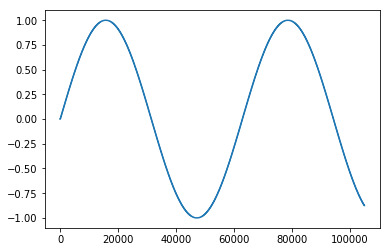

Pred phi


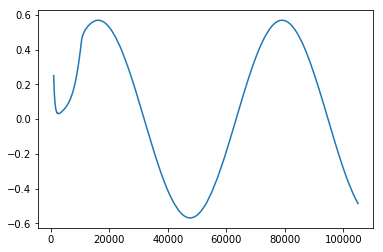

Phidot


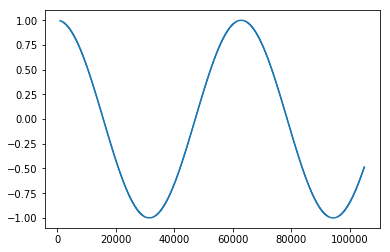

Predicted phidot


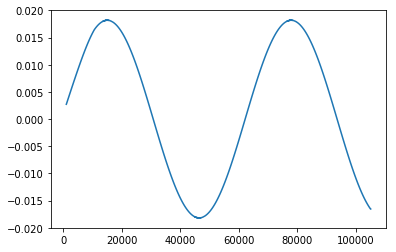

Phidotdot


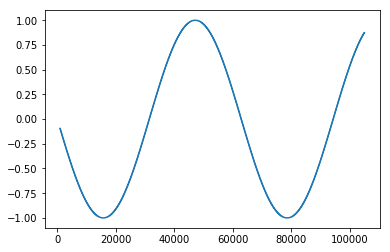

Predicted phidotdot


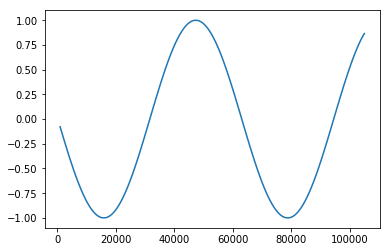

Mu1


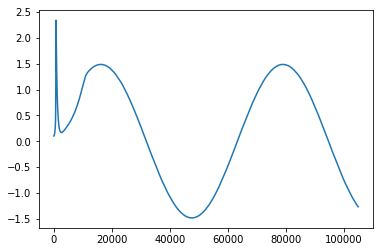

Mu2


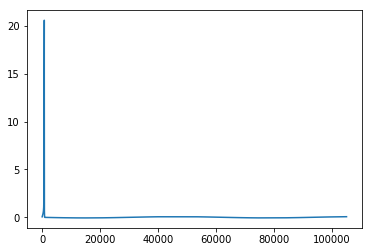

Mu3


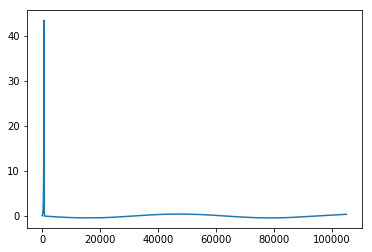

EZ1


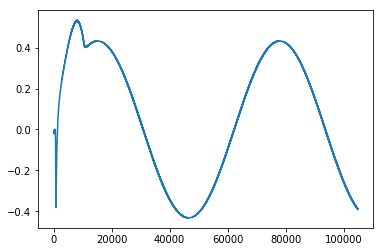

EZ2


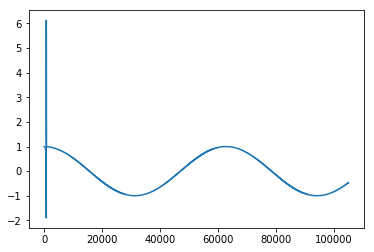

EZ3


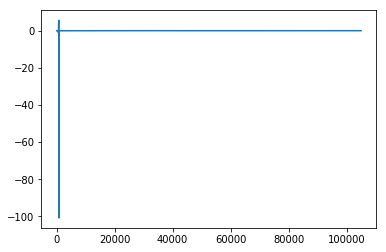

Ew1


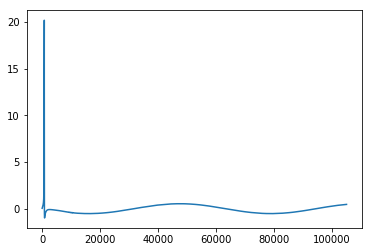

Ew2


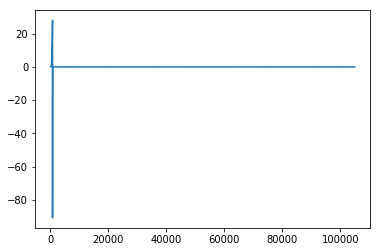

ThetaZ1


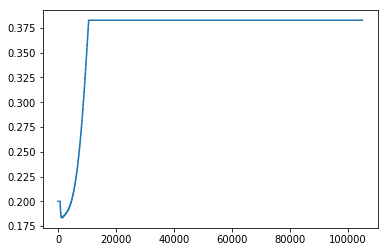

ThetaZ2


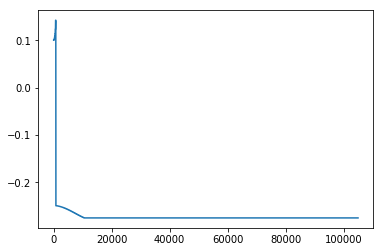

ThetaZ3


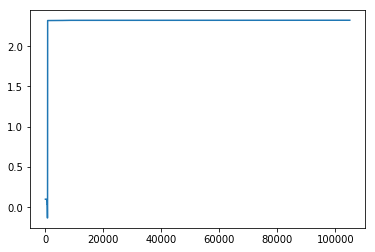

ThetaW1


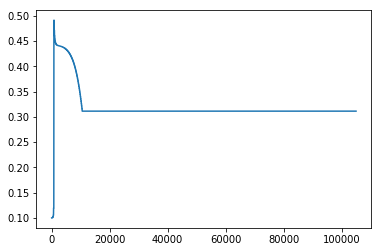

ThetaW2


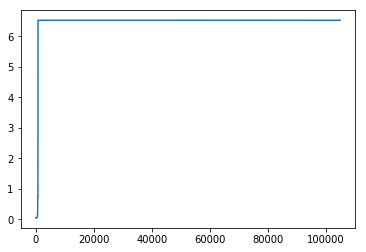

In [54]:

learning_rate = 0.01
inference_rate = 0.1
weight_rate = 0.1
epochs = 1000
inference_num = 105
time = range(epochs * inference_num)
f = 10000

#environment
phi = [np.sin(0)]
phidot = [np.cos(0)]
phidotdot = [-1 * np.sin(0)]

# agent!
thetaz1 = [0.2]
thetaz2 = [0.1]
thetaw1 = [0.1]
thetaz3 = [0.1]
thetaw2 = [0.05]

pred1 = [0]
pred2 = [0]
pred3 = [0]

mu1 = [0.1]
mu2 = [0.05]
mu3 = [0.05]

ez1 = [phi[0] - (thetaz1[0] * mu1[0])]
ez2 = [phidot[0] - (thetaz2[0] * mu2[0])]
ez3 = [phidotdot[0] - (thetaz3[0] * mu3[0])]
ew1 = [mu2[0] - (thetaw1[0] *mu1[0])]
ew2 = [mu3[0] - (thetaw2[0] * mu2[0])]

varz1 = 1
varz2 = 1
varw1 = 1
varw2 = 1
for i in range(1, inference_num*epochs):
    if i % inference_num == 0:
        phi.append(np.sin(i/f))
        phidot.append(np.cos(i/f))
        phidotdot.append(-1 * np.sin(i/f))
        # update!
        #if i % 5000 == 0:
         #   phidot[i] = -1 * phidot[i]
    # update prediction errors
    else:
        phi.append(phi[i-1])
        phidot.append(phidot[i-1])
        phidotdot.append(phidotdot[i-1])
    
    ez1.append(phi[i] - (thetaz1[i-1] * mu1[i-1]))
    ez2.append(phidot[i] - (thetaz2[i-1] * mu2[i-1]))
    ez3.append(phidotdot[i] - (thetaz3[i-1] * mu3[i-1]))
    ew1.append(mu2[i-1] - (thetaw1[i-1] * mu1[i-1])) 
    ew2.append(mu3[i-1] - (thetaw2[i-1] * mu2[i-1]))
    # update the mus
    mu1grad = (ez1[i] * thetaz1[i-1]) + (ew1[i] * thetaw1[i-1])
    mu1.append(mu1[i-1] + (learning_rate * mu1grad))
    mu2grad = (ez2[i] * thetaz2[i-1]) + (ew2[i] *thetaw2[i-1])
    mu2.append(mu2[i-1] + (learning_rate * mu2grad))
    mu3grad = (ez3[i] * thetaz3[i-1]) + ew2[i]
    mu3.append(mu3[i-1] + (learning_rate * mu3grad))
    
    #update the weights
    if i % inference_num == 0 and i <= 100 * inference_num: 
        thetaz1.append(thetaz1[i-1] + (learning_rate * (ez1[i]*mu1[i])))
        thetaz2.append(thetaz2[i-1] + learning_rate * (ez2[i] * mu2[i]))
        thetaz3.append(thetaz3[i-1] + (learning_rate * ez3[i] * mu3[i]))
        thetaw1.append(thetaw1[i-1] + learning_rate * (ew1[i] * mu1[i]))
        thetaw2.append(thetaw2[i-1] + learning_rate * (ew2[i] * mu2[i]))
    else:
        thetaz1.append(thetaz1[i-1])
        thetaz2.append(thetaz2[i-1])
        thetaz3.append(thetaz3[i-1])
        thetaw1.append(thetaw1[i-1])
        thetaw2.append(thetaw2[i-1])
        
    pred1.append(thetaz1[i] * mu1[i])
    pred2.append(thetaz2[i] * mu2[i])
    pred3.append(thetaz3[i] * mu3[i])
        
        
skip = 1000      
print("Phi")
plt.plot(time, phi)
plt.show()
print("Pred phi")
plt.plot(time[skip:], pred1[skip:])
plt.show()
print("Phidot")
plt.plot(time[skip:], phidot[skip:])
plt.show()
print("Predicted phidot")
plt.plot(time[skip:], pred2[skip:])
plt.show()
print("Phidotdot")
plt.plot(time[skip:], phidotdot[skip:])
plt.show()
print("Predicted phidotdot")
plt.plot(time[skip:], pred3[skip:])
plt.show()
print("Mu1")
plt.plot(time, mu1)
plt.show()
print("Mu2")
plt.plot(time, mu2)
plt.show()
print("Mu3")
plt.plot(time, mu3)
plt.show()
print("EZ1")
plt.plot(time, ez1)
plt.show()
print("EZ2")
plt.plot(time, ez2)
plt.show()
print("EZ3")
plt.plot(time, ez3)
plt.show()
print("Ew1")
plt.plot(time, ew1)
plt.show()
print("Ew2")
plt.plot(time, ew2)
plt.show()
print("ThetaZ1")
plt.plot(time, thetaz1)
plt.show()
print("ThetaZ2")
plt.plot(time, thetaz2)
plt.show()
print("ThetaZ3")
plt.plot(time, thetaz3)
plt.show()
print("ThetaW1")
plt.plot(time, thetaw1)
plt.show()
print("ThetaW2")
plt.plot(time, thetaw2)
plt.show()


Phi


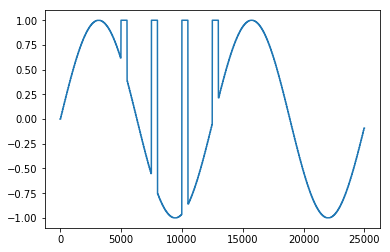

Pred phi


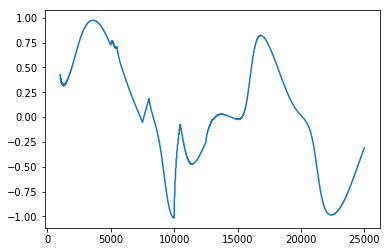

Phidot


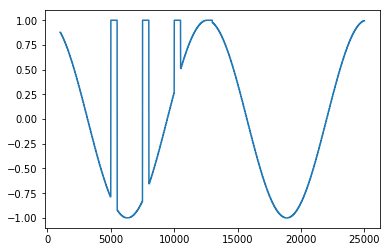

Predicted phidot


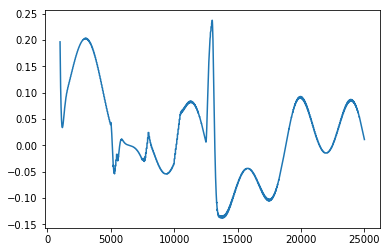

Phidotdot


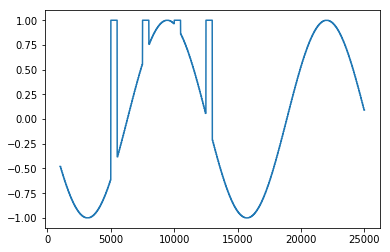

Predicted phidotdot


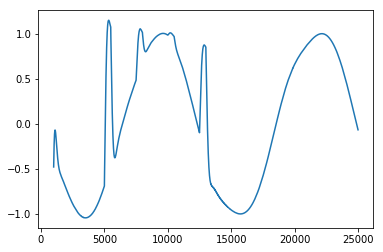

Mu1


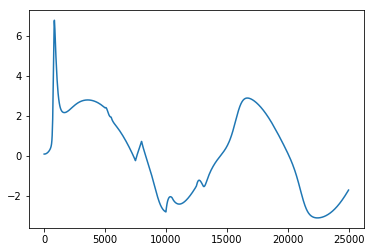

Mu2


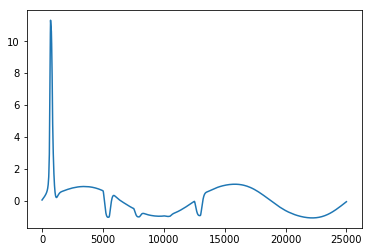

Mu3


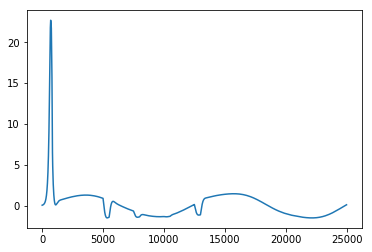

EZ1


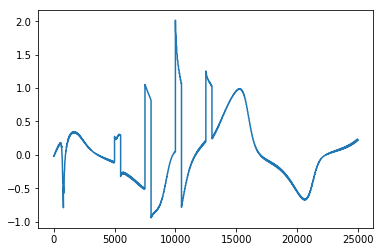

EZ2


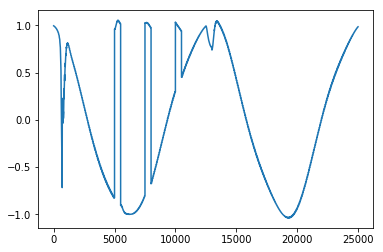

EZ3


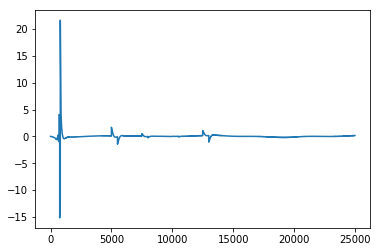

Ew1


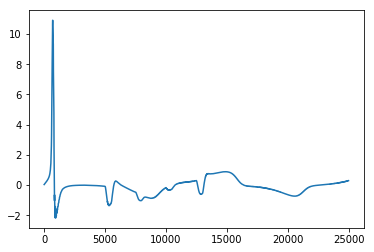

Ew2


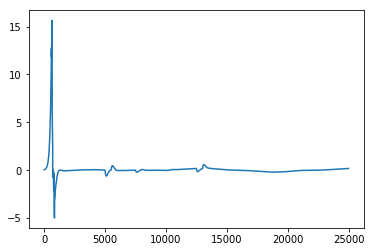

ThetaZ1


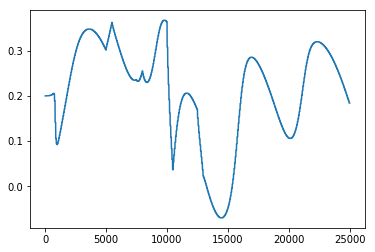

ThetaZ2


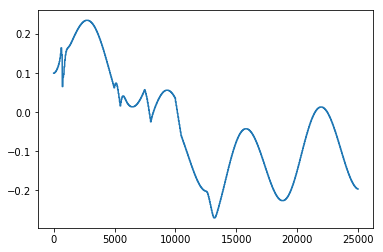

ThetaZ3


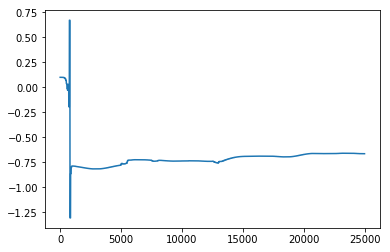

ThetaW1


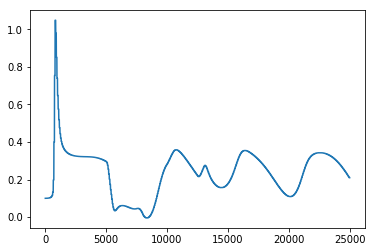

ThetaW2


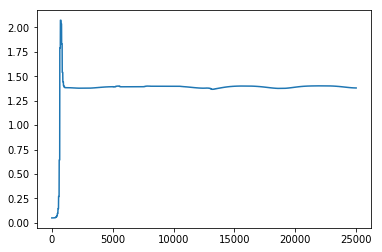

In [43]:

learning_rate = 0.01
inference_rate = 0.1
weight_rate = 0.1
epochs = 500
inference_num = 50
time = range(epochs * inference_num)
f = 2000

#environment
phi = [np.sin(0)]
phidot = [np.cos(0)]
phidotdot = [-1 * np.sin(0)]

anomaly_length = 10
anomaly_epochs = [100 * inference_num,150 * inference_num,200 * inference_num,250 * inference_num]

# agent!
thetaz1 = [0.2]
thetaz2 = [0.1]
thetaw1 = [0.1]
thetaz3 = [0.1]
thetaw2 = [0.05]

pred1 = [0]
pred2 = [0]
pred3 = [0]

mu1 = [0.1]
mu2 = [0.05]
mu3 = [0.05]

ez1 = [phi[0] - (thetaz1[0] * mu1[0])]
ez2 = [phidot[0] - (thetaz2[0] * mu2[0])]
ez3 = [phidotdot[0] - (thetaz3[0] * mu3[0])]
ew1 = [mu2[0] - (thetaw1[0] *mu1[0])] this
ew2 = [mu3[0] - (thetaw2[0] * mu2[0])]

varz1 = 1
varz2 = 1
varw1 = 1
varw2 = 1

anomaly = False
anomaly_dur = 0

for i in range(1, inference_num*epochs):
    if i % inference_num == 0:
        if i in anomaly_epochs:
            anomaly = True
        if anomaly is True and anomaly_dur <= anomaly_length:
            phi.append(1)
            phidot.append(1)
            phidotdot.append(1)
            anomaly_dur +=1
        if anomaly is False:
            phi.append(np.sin(i/f))
            phidot.append(np.cos(i/f))
            phidotdot.append(-1 * np.sin(i/f))
        
        if anomaly_dur >= anomaly_length:
            anomaly = False
            anomaly_dur = 0
    else:
        phi.append(phi[i-1])
        phidot.append(phidot[i-1])
        phidotdot.append(phidotdot[i-1])
    
    ez1.append(phi[i] - (thetaz1[i-1] * mu1[i-1]))
    ez2.append(phidot[i] - (thetaz2[i-1] * mu2[i-1]))
    ez3.append(phidotdot[i] - (thetaz3[i-1] * mu3[i-1]))
    ew1.append(mu2[i-1] - (thetaw1[i-1] * mu1[i-1]))
    ew2.append(mu3[i-1] - (thetaw2[i-1] * mu2[i-1]))
    # update the mus
    mu1grad = (ez1[i] * thetaz1[i-1]) + (ew1[i] * thetaw1[i-1])
    mu1.append(mu1[i-1] + (learning_rate * mu1grad))
    mu2grad = (ez2[i] * thetaz2[i-1]) + (ew2[i] *thetaw2[i-1]) 
    mu2.append(mu2[i-1] + (learning_rate * mu2grad))
    mu3grad = (ez3[i] * thetaz3[i-1]) + ew2[i]
    mu3.append(mu3[i-1] + (learning_rate * mu3grad))
    
    #update the weights
    if i % inference_num == 0 and i <= 10000000 * inference_num:
        thetaz1.append(thetaz1[i-1] + (learning_rate * (ez1[i]*mu1[i])))
        thetaz2.append(thetaz2[i-1] + learning_rate * (ez2[i] * mu2[i]))
        thetaz3.append(thetaz3[i-1] + (learning_rate * ez3[i] * mu3[i]))
        thetaw1.append(thetaw1[i-1] + learning_rate * (ew1[i] * mu1[i]))
        thetaw2.append(thetaw2[i-1] + learning_rate * (ew2[i] * mu2[i]))
    else:
        thetaz1.append(thetaz1[i-1])
        thetaz2.append(thetaz2[i-1])
        thetaz3.append(thetaz3[i-1])
        thetaw1.append(thetaw1[i-1])
        thetaw2.append(thetaw2[i-1])
        
    pred1.append(thetaz1[i] * mu1[i])
    pred2.append(thetaz2[i] * mu2[i])
    pred3.append(thetaz3[i] * mu3[i])
        
        
skip = 1000      
print("Phi")
plt.plot(time, phi)
plt.show()
print("Pred phi")
plt.plot(time[skip:], pred1[skip:])
plt.show()
print("Phidot")
plt.plot(time[skip:], phidot[skip:])
plt.show()
print("Predicted phidot")
plt.plot(time[skip:], pred2[skip:])
plt.show()
print("Phidotdot")
plt.plot(time[skip:], phidotdot[skip:])
plt.show()
print("Predicted phidotdot")
plt.plot(time[skip:], pred3[skip:])
plt.show()
print("Mu1")
plt.plot(time, mu1)
plt.show()
print("Mu2")
plt.plot(time, mu2)
plt.show()
print("Mu3")
plt.plot(time, mu3)
plt.show()
print("EZ1")
plt.plot(time, ez1)
plt.show()
print("EZ2")
plt.plot(time, ez2)
plt.show()
print("EZ3")
plt.plot(time, ez3)
plt.show()
print("Ew1")
plt.plot(time, ew1)
plt.show()
print("Ew2")
plt.plot(time, ew2)
plt.show()
print("ThetaZ1")
plt.plot(time, thetaz1)
plt.show()
print("ThetaZ2")
plt.plot(time, thetaz2)
plt.show()
print("ThetaZ3")
plt.plot(time, thetaz3)
plt.show()
print("ThetaW1")
plt.plot(time, thetaw1)
plt.show()
print("ThetaW2")
plt.plot(time, thetaw2)
plt.show()

